# Análisis de la posible sismicidad inducida presentada en La Loma, Cesar desde el espectro de frecuencias

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyproj
import plotly.graph_objects as go
#import obspy
#import spec 
#import scipy

## Antecedentes

-   https://www.elheraldo.co/economia/consejo-de-estado-ordena-suspender-produccion-de-gas-de-drummond-en-campo-la-loma-687184
-   https://co.boell.org/es/2022/09/12/pierden-con-el-carbon-y-sin-el-los-dilemas-de-la-transicion-energetica-en-cesar
-   https://elpilon.com.co/consejo-de-estado-revoco-medida-que-suspendia-trabajo-de-drummond-en-15-pozos-del-cesar/
-   https://guiadelgas.com/industria/consejo-de-estado-suspende-15-pozos-de-drummond-en-el-campo-la-loma/
-   https://www.semana.com/impacto/articulo/drummond-tendra-que-suspender-operaciones-en-15-pozos-de-gas-en-el-cesar/48075/
-   https://www.elheraldo.co/economia/consejo-de-estado-ordena-suspender-produccion-de-gas-de-drummond-en-campo-la-loma-687184

"Las actividades de estimulación hidráulica se adelantaron entre el 14 de marzo de 2018 y el tercer trimestre del mismo año, por medio de la perforación de 15 pozos. Esos pozos actualmente se encuentran en fase de producción."

## Filtros

Para este trabajo se utilizo una ventana de tiempo entre 1 de Junio de 1993 y 7 de Noviembre del 2022, para sismos con profundidades menores a 16 km, como lo dice la normatividad Colombiana, en un area cuadrada de () y ().

## Datos

-   Datos de pozos extraidos de https://srvags.sgc.gov.co/JSViewer/GEOVISOR_BIP/
-   Datos del area minera extraidos de ____
-   Datos de sismos extraidos de http://bdrsnc.sgc.gov.co/paginas1/catalogo/index.php
    -   http://bdrsnc.sgc.gov.co/paginas1/catalogo/Consulta_Experta/consulsismo3.php?pagina=1&longitudStart=-73.76&lat=&longitudEnd=-73.30&latitudStart=9.35&latitudEnd=9.90&magnitudStart=0&magnitudEnd=9&magnitudmwStart=0&magnitudmwEnd=9&depthStart=0&depthEnd=18&rmsStart=0&rmsEnd=10&inicial=01/06/1993&final=28/02/2018&contipo=cuadrante&longcentral=&radio=&registro1=70&departamento=&municipio=&gapinicio=0&gapfinal=360&eprofmin=0&elongmin=0&elatmin=0&eprofmax=999&elongmax=999&elatmax=999
    -   

## Manejo de Datos

### Pozos

In [63]:
well=pd.read_csv('BIP_pozos.csv')
well=well[np.isin(well['FIELD_ABRE'],['LA LOMA','LA LOMA (LA LOMA)'])]

In [64]:
region=(well['WELL_X_COO'].max()+10000,well['WELL_Y_COO'].max()+10000,well['WELL_X_COO'].min()-10000,well['WELL_Y_COO'].min()-10000)

In [65]:
region[0]

1085283.0

In [66]:
region[2]

1034438.5

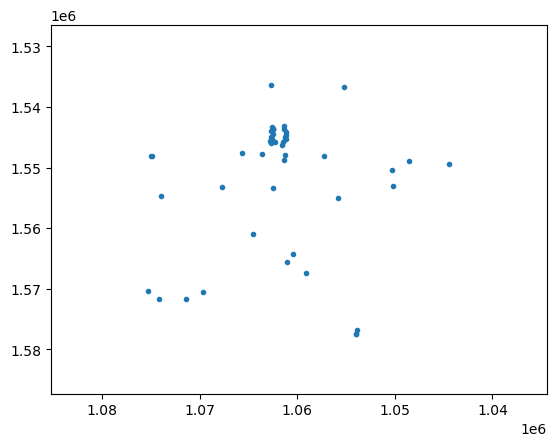

In [67]:
plt.plot(well['WELL_X_COO'],well['WELL_Y_COO'],'.')
plt.xlim(region[0],region[2])
plt.ylim(region[1],region[3])
plt.show()

Pasar de coordenadas geográficas a métricas

In [68]:
magnas_wgs = pyproj.Transformer.from_crs('epsg:3116', 'epsg:4326')

In [69]:
x,y=([region[0],region[0],region[2],region[2]],[region[1],region[3],region[1],region[3]])

In [70]:
lat, lon = magnas_wgs.transform(y, x)
lat, lon = np.array(lat),np.array(lon)

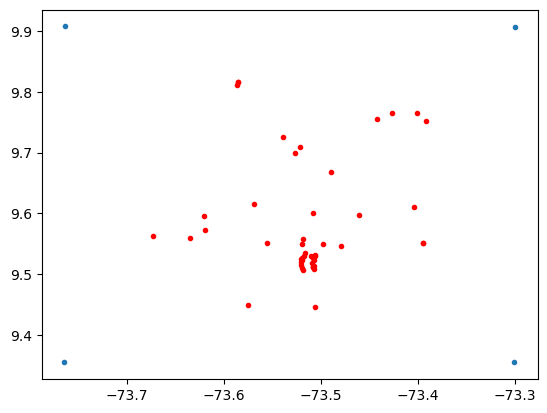

In [71]:
plt.plot(well['WELL_LONGI'],well['WELL_LATIT'],'r.')
plt.plot(lon,lat,'.')

In [72]:
reg=(lon.max(),lat.max(),lon.min(),lat.min())

In [73]:
filtros=[-73.76,9.35,-73.30,9.90]

In [74]:
well['DP']=well['WELL_TVD']*0.3048

### Sismos

In [75]:
da=pd.read_csv('SEISAN.csv',delimiter=';',decimal=',')
db=pd.read_csv('SEISCOMP.csv')

In [76]:
da['UTC']=da['FECHA']+[' ']*len(da['FECHA'])+da['HORA_UTC']
da=da[['UTC', 'LATITUD (grados)', 'LONGITUD (grados)','PROFUNDIDAD (Km)', 'MAGNITUD Ml','RMS (Seg)', 'GAP (grados)','ERROR LATITUD (Km)', 'ERROR LONGITUD (Km)', 'ERROR PROFUNDIDAD (Km)',]]
db=db[['Fecha-Hora  (UTC)', 'Lat(°)', 'Long(°)', 'Prof(Km)', 'Mag.', 'Rms(Seg)', 'Gap(°)', 'Error Lat(Km)','Error Long(Km)', 'Error Prof(Km)']]


In [77]:
renb={}
for key,val in zip(['Fecha-Hora  (UTC)', 'Lat(°)', 'Long(°)', 'Prof(Km)', 'Mag.', 'Rms(Seg)', 'Gap(°)', 'Error Lat(Km)','Error Long(Km)', 'Error Prof(Km)'],
                    ['UTC','LAT','LON','DP','MAG','RMS','GAP','ELAT','ELON','EDP']):
    renb[key]=val

In [78]:
db=db.rename(columns=renb)

In [79]:
rena={}
for key,val in zip(['UTC', 'LATITUD (grados)', 'LONGITUD (grados)','PROFUNDIDAD (Km)', 'MAGNITUD Ml', 'RMS (Seg)', 'GAP (grados)','ERROR LATITUD (Km)', 'ERROR LONGITUD (Km)', 'ERROR PROFUNDIDAD (Km)'],
                    ['UTC','LAT','LON','DP','MAG','RMS','GAP','ELAT','ELON','EDP']):
    rena[key]=val

In [80]:
da=da.rename(columns=rena)

In [81]:
eq=pd.concat([da,db])

C:\Users\jujim\AppData\Local\Temp\ipykernel_16660\2400040990.py:2: UserWarning:

You passed a edgecolor/edgecolors ('red') for an unfilled marker (11).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



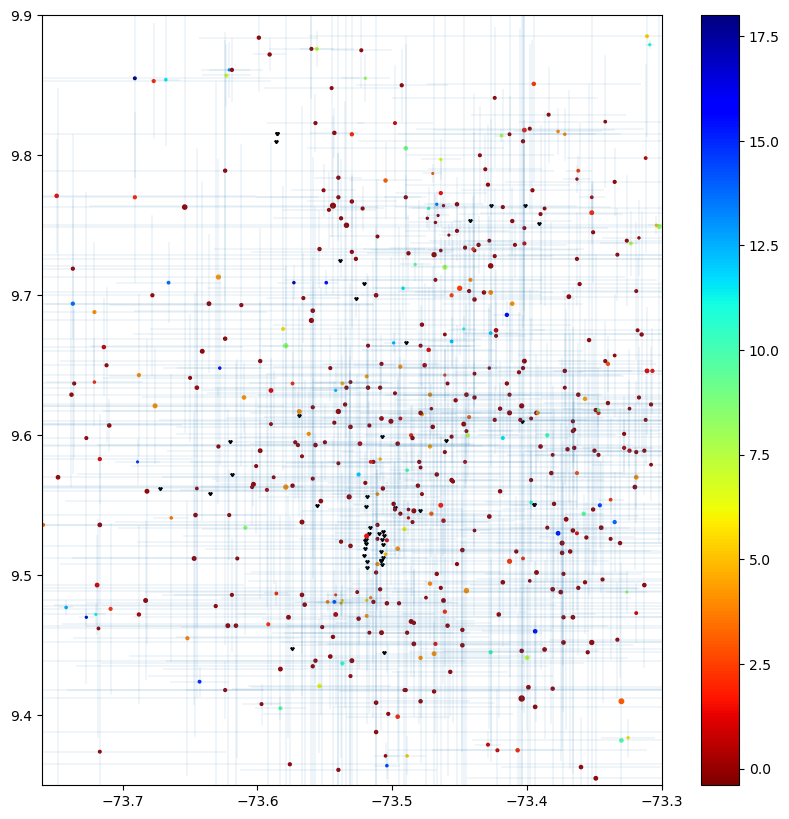

In [82]:
plt.figure(figsize=(10,10))
plt.scatter(well['WELL_LONGI'],well['WELL_LATIT'],c='black',marker=11,s=6,edgecolor='red')
plt.errorbar(eq['LON'],eq['LAT'],yerr=eq['ELAT']/111.1,xerr=eq['ELON']/111.1,elinewidth=0.1,fmt='none')
plt.scatter(eq['LON'],eq['LAT'],c=eq['DP'],cmap='jet_r',s=2**eq['MAG'])
plt.colorbar()
plt.xlim(filtros[0],filtros[2])
plt.ylim(filtros[1],filtros[3])
plt.show()

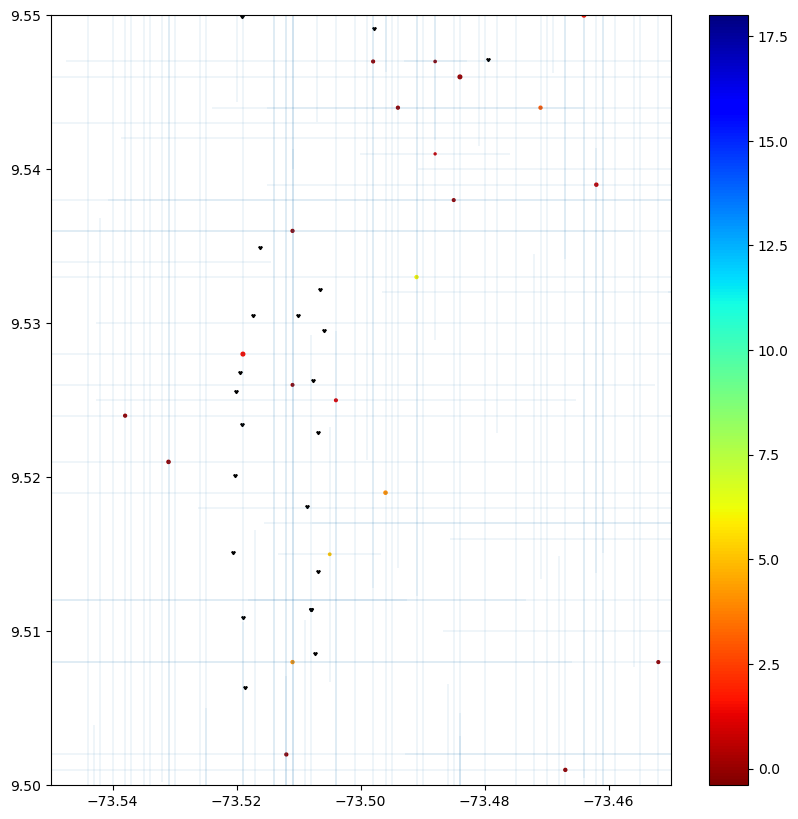

In [83]:
plt.figure(figsize=(10,10))
plt.errorbar(eq['LON'],eq['LAT'],yerr=eq['ELAT']/111.1,xerr=eq['ELON']/111.1,elinewidth=0.1,fmt='none')
plt.scatter(well['WELL_LONGI'],well['WELL_LATIT'],c='black',marker=11,s=6)
plt.scatter(eq['LON'],eq['LAT'],c=eq['DP'],cmap='jet_r',s=2**eq['MAG'])
plt.colorbar()
plt.xlim(-73.55,-73.45)
plt.ylim(9.5,9.55)
plt.show()

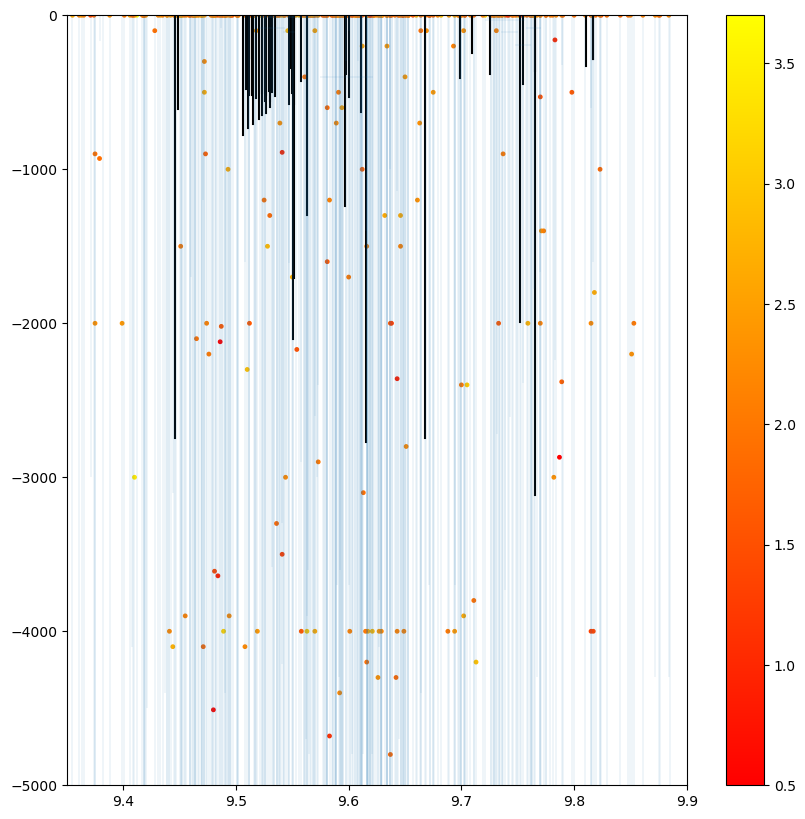

In [84]:
plt.figure(figsize=(10,10))
plt.plot([well['WELL_LATIT'],well['WELL_LATIT']],[[0]*len(well['DP']),well['DP']*-1],'k')
plt.errorbar(eq['LAT'],eq['DP']*1000,yerr=eq['EDP']*1000,xerr=eq['ELAT']/111.1,elinewidth=0.1,fmt='none')
plt.scatter(eq['LAT'],eq['DP']*-1000,c=eq['MAG'],s=6,cmap='autumn')
plt.colorbar()
plt.ylim(-5000,0)
plt.xlim(filtros[1],filtros[3])
# plt.xlim(9.5,9.55)
plt.show()

In [85]:
cumulative=np.cumsum([1]*len(eq['UTC']))

In [86]:
eq['UTC']=pd.to_datetime(eq['UTC'])
slope=pd.DataFrame()
slope['day']=(eq['UTC'].map(pd.Timestamp.timestamp)-8.49751113e+08)/(3600*24)
slope['cum']=cumulative

In [87]:
slopev=[]
for i in range(len(slope['day'].values)-1):
    slopev.append((slope['cum'].values[i+1]-slope['cum'].values[i])/(slope['day'].values[i+1]-slope['day'].values[i]))

In [88]:
fig = go.Figure(data=go.Scatter(x=eq['UTC'], y=cumulative))
fig.show()

In [89]:
fig = go.Figure(data=[go.Scatter3d(
    x=eq['LON'],
    y=eq['LAT'],
    z=eq['DP']*-1,
    mode='markers',
    marker=dict(
        size=2**eq['MAG'],
        color=eq['DP'],                # set color to an array/list of desired values
        colorscale='Jet_r',   # choose a colorscale
        opacity=0.8
    )
)])
pozos=go.Scatter3d(
    x=well['WELL_LONGI'],
    y=well['WELL_LATIT'],
    z=[0]*len(well['WELL_LATIT']),
    mode='markers',
    marker=dict(
        size=5,
        color='black',                # set color to an array/list of desired values
        # colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    ),
    error_z=dict(
        array=[0]*len(well['WELL_LONGI']), 
        arrayminus=well['DP']/1000,             
        color='black',   # choose a colorscale
        symmetric=False,
        # colorscale='Jet',
        width=0.01,
        visible=True
    )
)
fig.add_trace(pozos)
fig.show()

In [90]:
# fig = go.Figure(data=go.Scatter(x=eq['UTC'].values[0:-1], y=slopev))
# fig.show()

### Formas de Onda 

In [248]:
from obspy import read
# from obspy.signal import filter
import matplotlib.pyplot as plt
# import obspy
# from obspy.clients.fdsn import Client
# from obspy.signal.trigger import recursive_sta_lta, trigger_onset
from obspy.core.utcdatetime import UTCDateTime
from obspy.core.event.catalog import read_events
from scipy.fft import fft, fftfreq

In [250]:
st = read('data/2015-12-13-1849-21S.COL___184') #[CAMBIAR] Carpeta con TODAS las fromas de onda
tr = st.select(id="CM.LL7C.00.HHZ")[0]
ztra=[tr] #TODAS las trazas que cumplan los requisitos
# for i in st: #Esos datos tiene varias trazas
#      if  'LL7' in i.stats.station:#LL7 es la estacion con la que se hará el analisis de ALGUNOS sismos, por el periodo
#         if i.stats.channel=='HHZ' or i.stats.channel=='EHZ': #Principalmente en el eje vertical
#             ztra.append(i)
#             pass

¿Cual es la mejor estacion para hacer el analisis espectral?¿La mas cercana por periodo de tiempo?¿Revisar boletines? Para el periodo de (15/10/2015)-(22/03/18)

<b>10/11/22*<b/><br>
<br>
1.  Espectro de Fourier
2.  Evaluar atributos del dominio de las frecuencias según "Cadena Ibarra, O. (2021). Modelos de fuente de sismicidad LP para la actividad del volcán Galeras 2004-2010 (Colombia). Universidad Nacional de Colombia."

In [251]:
sf=read_events('data/13-1851-39L.S201512') #[CAMBIAR] Carpeta a los SFILE

c:\Users\jujim\anaconda3\envs\cdt\lib\site-packages\obspy\io\nordic\utils.py:184: UserWarning:

Lines of type I have not been implemented yet, please submit a development request



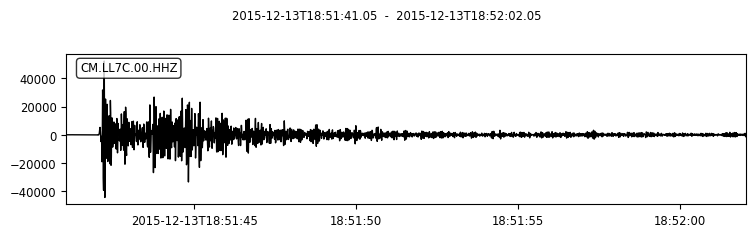

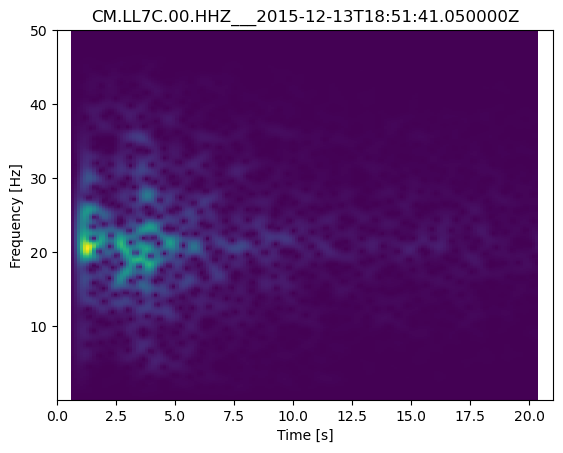

In [252]:
for i in ztra:
    i=i.copy()
    #Aplicarle un filtro pasa alto!!!!!!
    #i.filter('lowpass', freq=1/100, corners=2, zerophase=True)
    #i.data = filter.lowpass(i.data,freq=100, corners=1, zerophase=True, df=i.stats.sampling_rate)
    # i.plot()
    i.filter('highpass', freq=1.0, corners=2, zerophase=True)
    # i.filter('highpass',freq=1)
    for h in sf[0].picks: #cambiar s file por archivo
        if h.waveform_id.station_code=='LL7C':
            if h.waveform_id.channel_code=='HZ':
                if h.phase_hint=='P':
                    dt=UTCDateTime(h.time)
        else:
            pass
    # dt = UTCDateTime("2015-12-13T18:51:40") #auto cut
    i.trim(dt-1, dt + 20)  
    i.plot()
    spec=i.spectrogram(log=False, title=i.stats.network+'.'+i.stats.station+'.'+i.stats.location+'.'+i.stats.channel +'___'+ str(i.stats.starttime))
    #Espectro de Fourier
    

AttributeError: 'NoneType' object has no attribute 'plot'

In [253]:
# Construcción de la señal
N = i.stats.npts# number of point in the whole interval
f = i.stats.sampling_rate
dt = i.stats.delta
# t = np.linspace( 0, (N-1)*dt, N)
y = i.data

In [254]:
fft_x = fft(y) / N # FFT Normalized
freq = fftfreq(N, dt) # Recuperamos las frecuencias

(0.0, 1000.0)

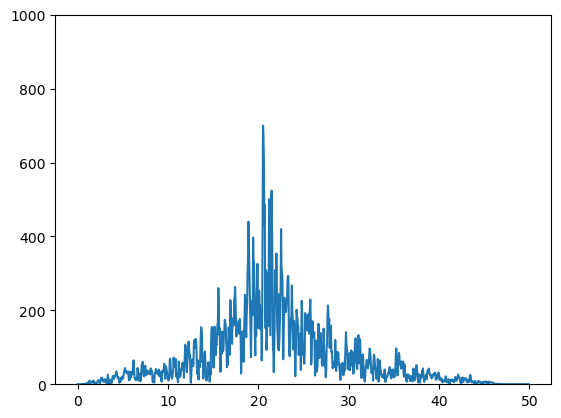

In [255]:
plt.plot(freq[range(int(N/2))],abs(fft_x[range(int(N/2))]))
plt.ylim(0,1000)

In [256]:
four=pd.DataFrame()
four['freq']=freq[range(int(N/2))]
four['ampl']=abs(fft_x[range(int(N/2))])

In [277]:
#Frecuencia dominante
freq_dom=four[four['ampl']==four['ampl'].max()]['freq'].values[0]
print(freq_dom)

20.5140409328891


In [275]:
#Frecuencia central [PROVISIONAL] Mejorar metodo de integracion
ae=four['ampl'].sum()/2
four['cum']=np.cumsum(four['ampl'])
four['dist']=np.abs(ae-four['cum'])
freq_cent=four[four['dist']==four['dist'].min()]['freq'].values[0]
print(freq_cent)

21.180390290337932


In [276]:
#Frecuencia Centroide
import numpy as np
#https://stackoverflow.com/questions/24354279/python-spectral-centroid-for-a-wav-file
def spectral_centroid(x, samplerate):
    magnitudes = np.abs(np.fft.rfft(x)) # magnitudes of positive frequencies
    length = len(x)
    freqs = np.abs(np.fft.fftfreq(length, 1.0/samplerate)[:length//2+1]) # positive frequencies
    return np.sum(magnitudes*freqs) / np.sum(magnitudes) # return weighted mean
freq_centroid=spectral_centroid(i.data, i.stats.sampling_rate)
print(freq_centroid)

21.82476838541982


In [278]:
import scipy

In [281]:
scipy.signal.find_peaks(i.data)

(array([   6,    8,   13,   18,   24,   28,   33,   38,   43,   47,   50,
          52,   54,   59,   63,   70,   74,   79,   81,   84,   86,   88,
          90,   93,   95,   97,   99,  104,  108,  112,  117,  121,  126,
         132,  136,  141,  147,  152,  156,  160,  163,  166,  170,  175,
         179,  183,  188,  193,  197,  203,  207,  211,  214,  219,  223,
         227,  235,  239,  244,  248,  253,  258,  263,  267,  271,  277,
         281,  286,  290,  296,  301,  306,  311,  317,  322,  327,  331,
         335,  339,  344,  349,  354,  358,  361,  364,  369,  374,  380,
         383,  387,  392,  397,  401,  404,  408,  413,  418,  422,  426,
         428,  434,  439,  444,  448,  454,  459,  462,  467,  472,  476,
         481,  485,  488,  491,  495,  500,  504,  509,  513,  517,  523,
         529,  534,  536,  540,  544,  549,  555,  560,  564,  569,  574,
         578,  584,  589,  593,  599,  603,  608,  611,  614,  617,  622,
         625,  629,  633,  637,  639, 

In [280]:
#Frecuencia de maxima energia
scipy.signal.find_peaks_cwt(i.data,np.arange(1,10))

array([   1,   23,   56,  117,  171,  272,  301,  323,  397,  440,  472,
        481,  565,  584,  593,  674,  684,  691,  721,  770,  822,  895,
        909,  945,  972, 1099, 1122, 1132, 1182, 1236, 1254, 1428, 1510,
       1515, 1543, 1566, 1609, 1673, 1733, 1838, 1879, 1913, 1935, 1981,
       1986, 2064], dtype=int64)

In [ ]:
#Banda de energía 70%


In [ ]:
# Indice de Frecuencia


In [ ]:
#Duracion -revisar ondas coda
